In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings ('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_excel(r"Past_Data.xlsx")
df

,Index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,511306,52,2,2013-01-01,0,0,0,a,1,0
1,150763,677,2,2013-01-01,0,0,0,a,1,0
2,633749,348,2,2013-01-01,0,0,0,a,1,0
3,106460,966,2,2013-01-01,0,0,0,a,1,0
4,278363,750,2,2013-01-01,0,0,0,a,1,0
...,...,...,...,...,...,...,...,...,...,...
570549,162217,126,3,2015-04-22,416,1,0,0,0,3856
570550,373333,715,3,2015-04-22,613,1,0,0,0,5154
570551,586351,93,3,2015-04-22,553,1,0,0,0,4923
570552,672462,845,3,2015-04-22,302,1,0,0,0,3974


In [4]:
df.isna().sum().sum()

0

In [5]:
df.duplicated().sum()

0

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['index', 'store_id', 'day_of_week', 'date', 'nb_customers_on_day',
       'open', 'promotion', 'state_holiday', 'school_holiday', 'sales'],
      dtype='object')

In [7]:
df.dtypes

index                           int64
store_id                        int64
day_of_week                     int64
date                   datetime64[ns]
nb_customers_on_day             int64
open                            int64
promotion                       int64
state_holiday                  object
school_holiday                  int64
sales                           int64
dtype: object

In [8]:
df.nunique()
# there are 570554 entries of store's data

index                  570554
store_id                 1115
day_of_week                 7
date                      842
nb_customers_on_day      3836
open                        2
promotion                   2
state_holiday               4
school_holiday              2
sales                   19758
dtype: int64

In [9]:
cat_vars = ['day_of_week','open', 'promotion', 'state_holiday', 'school_holiday']
for column in cat_vars:
    unique_values = df[column].unique()
    print(f"Unique values for {column}:")
    print(unique_values)
    print()

Unique values for day_of_week:
[2 3 4 5 6 7 1]

Unique values for open:
[0 1]

Unique values for promotion:
[0 1]

Unique values for state_holiday:
['a' 0 'b' 'c']

Unique values for school_holiday:
[1 0]



In [10]:
coverage_mapping = {'a': 1, 'b': 1, 'c': 1, 0: 0}
df['state_holiday'] = df['state_holiday'].map(coverage_mapping)
df['state_holiday'].unique()

array([1, 0], dtype=int64)

In [11]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.quarter

In [12]:
df_closedays = df[df['open'] == 0]
df_closedays

,index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year,quarter
0,511306,52,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1
1,150763,677,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1
2,633749,348,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1
3,106460,966,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1
4,278363,750,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568452,553582,175,7,2015-04-19,0,0,0,0,0,0,19,4,2015,2
568453,684736,22,7,2015-04-19,0,0,0,0,0,0,19,4,2015,2
568454,343818,460,7,2015-04-19,0,0,0,0,0,0,19,4,2015,2
568455,459956,303,7,2015-04-19,0,0,0,0,0,0,19,4,2015,2


In [13]:
df_opendays = df[df['open'] == 1]
df_opendays

,index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year,quarter
199,580156,676,2,2013-01-01,777,1,0,1,1,3821,1,1,2013,1
223,277247,274,2,2013-01-01,729,1,0,1,1,3102,1,1,2013,1
305,253110,423,2,2013-01-01,1751,1,0,1,1,9643,1,1,2013,1
312,239216,259,2,2013-01-01,1444,1,0,1,1,6851,1,1,2013,1
421,60765,769,2,2013-01-01,1248,1,0,1,1,5035,1,1,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570549,162217,126,3,2015-04-22,416,1,0,0,0,3856,22,4,2015,2
570550,373333,715,3,2015-04-22,613,1,0,0,0,5154,22,4,2015,2
570551,586351,93,3,2015-04-22,553,1,0,0,0,4923,22,4,2015,2
570552,672462,845,3,2015-04-22,302,1,0,0,0,3974,22,4,2015,2


### EDA

#### Target variable = Sales

In [10]:
df['sales'].describe()

count    570554.000000
mean       5747.951561
std        3840.647305
min           0.000000
25%        3703.000000
50%        5709.000000
75%        7818.000000
max       38722.000000
Name: sales, dtype: float64

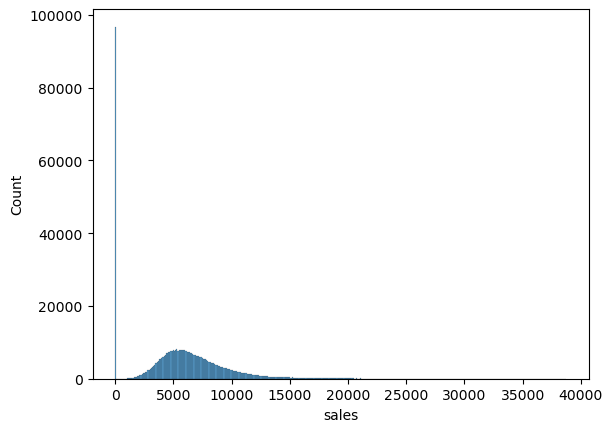

In [11]:
sns.histplot(df['sales'])
plt.show()
# when are sales = 0?

In [12]:
df_close = df[df['open'] == 0]
df_close['sales'].describe()
# when store is closed, sales = 0

count    96747.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: sales, dtype: float64

In [13]:
count_zero_sales = len(df_close)
count_zero_sales
# in 96.747 rows, around 17% of the dataset, stores are closed therefore sales are 0

96747

In [14]:
df_open = df[df['open'] == 1]
df_open['sales'].describe()

# there are 473807 entries of sales for when stores are open
# when stores are open some sales are still 0

count    473807.00000
mean       6921.63002
std        3104.62928
min           0.00000
25%        4825.00000
50%        6330.00000
75%        8322.00000
max       38722.00000
Name: sales, dtype: float64

In [15]:
zero_sales_rows = df_open[df_open['sales'] == 0]
count_zero_sales = len(zero_sales_rows)
count_zero_sales
# only 28 cases of 0 sales on open days (around 0,005% of the whole dataset and 0,006% of open days)

28

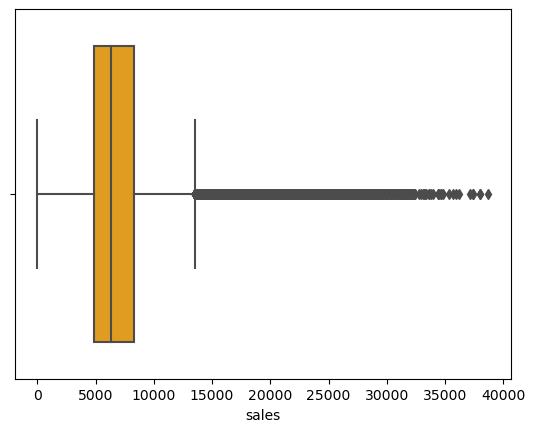

In [16]:
sns.boxplot(x= df_open[df_open['open'] == 1]['sales'], color = 'orange')
plt.show()

In [17]:
df_stores = df_open.groupby('store_id').agg({'sales': ['sum']})

for col in df_stores.columns:
    Q1 = df_stores[col].quantile(0.25)
    Q3 = df_stores[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Column: {col}, Lower Bound: {lower_bound}, Q1: {Q1}, IQR: {IQR}, Q3: {Q3}, Upper Bound: {upper_bound}")

Column: ('sales', 'sum'), Lower Bound: 334780.25, Q1: 2191956.5, IQR: 1238117.5, Q3: 3430074.0, Upper Bound: 5287250.25


In [18]:
df_customers = df_open.groupby('store_id').agg({'nb_customers_on_day': ['max']})

for col in df_customers.columns:
    Q1 = df_customers[col].quantile(0.25)
    Q3 = df_customers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Column: {col}, Lower Bound: {lower_bound}, Q1: {Q1}, IQR: {IQR}, Q3: {Q3}, Upper Bound: {upper_bound}")

Column: ('nb_customers_on_day', 'max'), Lower Bound: 143.75, Q1: 999.5, IQR: 570.5, Q3: 1570.0, Upper Bound: 2425.75


#### Number of customers on day

In [19]:
df['nb_customers_on_day'].describe()

count    570554.000000
mean        633.787650
std         464.853366
min           0.000000
25%         403.000000
50%         609.000000
75%         839.000000
max        5494.000000
Name: nb_customers_on_day, dtype: float64

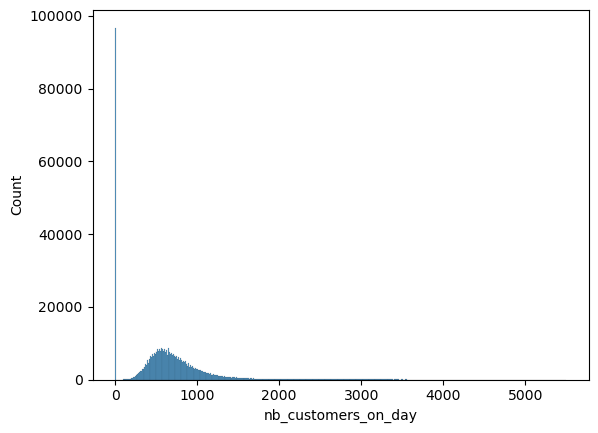

In [20]:
sns.histplot(df['nb_customers_on_day'])
plt.show()

In [21]:
df_open = df[df['open'] == 1]
df_open['nb_customers_on_day'].describe()
# some open days have nb_customers_on_day = 0

count    473807.000000
mean        763.201217
std         401.800007
min           0.000000
25%         518.000000
50%         676.000000
75%         894.000000
max        5494.000000
Name: nb_customers_on_day, dtype: float64

In [22]:
zero_cust_rows = df_open[df_open['sales'] == 0]
count_zero_cust = len(zero_cust_rows)
count_zero_cust

# 28 days when stores where open but there were no customers and sales were 0

28

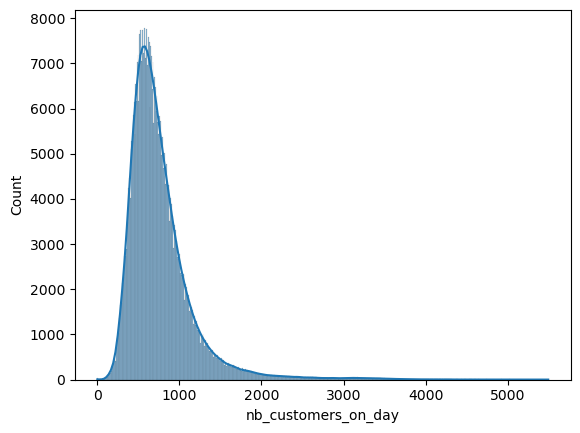

In [23]:
sns.histplot(df_open['nb_customers_on_day'], kde=True)
plt.show()

-46.0
1458.0


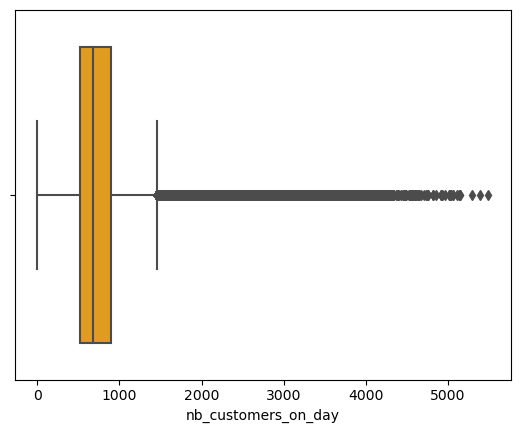

In [24]:
# To understand the outliers
Q1 = df_open['nb_customers_on_day'].quantile(0.25)
Q3 = df_open['nb_customers_on_day'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR 
print(lower_bound)
print (upper_bound)

sns.boxplot(x= df[df['open'] == 1]['nb_customers_on_day'], color = 'orange')
plt.show()

# days with a count of customers superior to 1458 can be considered outliers

In [25]:
df_close = df[df['open'] == 0]
df_close['nb_customers_on_day'].describe()
# when the store is close, there are no customers

count    96747.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: nb_customers_on_day, dtype: float64

#### Open

In [26]:
df.groupby('open').agg({'sales': ['min', 'mean', 'max', 'std', 'sum']})
# when the store is closed, there are no sales

sales                                           
       min        mean    max         std         sum
open                                                 
0        0     0.00000      0     0.00000           0
1        0  6921.63002  38722  3104.62928  3279516755

In [27]:
df_opendays = df[df['open'] == 1]
df_opendays.nunique()

index                  473807
store_id                 1115
day_of_week                 7
date                      842
nb_customers_on_day      3836
open                        1
promotion                   2
state_holiday               2
school_holiday              2
sales                   19758
dtype: int64

In [28]:
cat_vars = ['day_of_week','open', 'promotion', 'state_holiday', 'school_holiday']
for column in cat_vars:
    unique_values = df_opendays[column].unique()
    print(f"Unique values for {column}:")
    print(unique_values)
    print()

Unique values for day_of_week:
[2 3 4 5 6 7 1]

Unique values for open:
[1]

Unique values for promotion:
[0 1]

Unique values for state_holiday:
[1 0]

Unique values for school_holiday:
[1 0]



In [29]:
df_closedays = df[df['open'] == 0]
df_closedays.nunique()

index                  96747
store_id                1105
day_of_week                7
date                     572
nb_customers_on_day        1
open                       1
promotion                  2
state_holiday              2
school_holiday             2
sales                      1
dtype: int64

In [30]:
cat_vars = ['day_of_week','open', 'promotion', 'state_holiday', 'school_holiday']
for column in cat_vars:
    unique_values = df_closedays[column].unique()
    print(f"Unique values for {column}:")
    print(unique_values)
    print()

Unique values for day_of_week:
[2 3 4 5 6 7 1]

Unique values for open:
[0]

Unique values for promotion:
[0 1]

Unique values for state_holiday:
[1 0]

Unique values for school_holiday:
[1 0]



#### Store ID

In [31]:
# top 10 stores with higher average sales
df.groupby('store_id').agg({'sales': ['min', 'mean', 'max', 'std']}).sort_values(by=('sales', 'mean'), ascending=False).head (10)

sales                                  
            min          mean    max          std
store_id                                         
262       13210  20677.108856  38722  4707.913245
817           0  18179.043716  38025  9203.650275
562       11002  18011.096296  28680  2991.374814
1114          0  16692.282150  33188  8103.285647
251           0  15839.292683  35350  7926.332358
842           0  15058.469543  32228  7627.450043
733        6838  14974.899606  22137  1916.514484
513           0  14942.075646  29019  7685.511172
788           0  14775.244275  32170  7300.223353
383           0  14339.615385  28426  7177.749731

In [32]:
# top 10 stores with higher sum of sales
df.groupby('store_id').agg({'sales': ['sum']}).sort_values(by=('sales', 'sum'), ascending=False).head (10)

,sales
,sum
store_id,
262,11206993
817,9980295
562,9725992
1114,8696679
251,8442343
513,8098605
788,7742228
733,7607249


In [33]:
# bottom 10 stores with lower average sales
df.groupby('store_id').agg({'sales': ['min', 'mean', 'max', 'std']}).sort_values(by=('sales', 'mean'), ascending=False).tail(10)

sales                                 
           min         mean    max          std
store_id                                       
656          0  2623.555110   6681  1376.627167
841          0  2573.424419   7020  1537.471412
794          0  2535.434622   5920  1271.013177
219          0  2531.983271   5801  1420.209940
254          0  2472.831740   6114  1346.570319
972          0  2459.104364  10904  1904.721376
208          0  2408.266071   5864  1311.091069
198          0  2404.124767   8772  1857.319982
543          0  2343.007707   7847  1536.099728
307          0  2231.179584   6951  1382.827867

In [34]:
# bottom 10 stores with lower sum of sales
df.groupby('store_id').agg({'sales': ['sum']}).sort_values(by=('sales', 'sum'), ascending=False).tail(10)

,sales
,sum
store_id,
32,1309403
656,1309154
972,1295948
254,1293291
198,1291015
186,1286591
1056,1273251
543,1216021


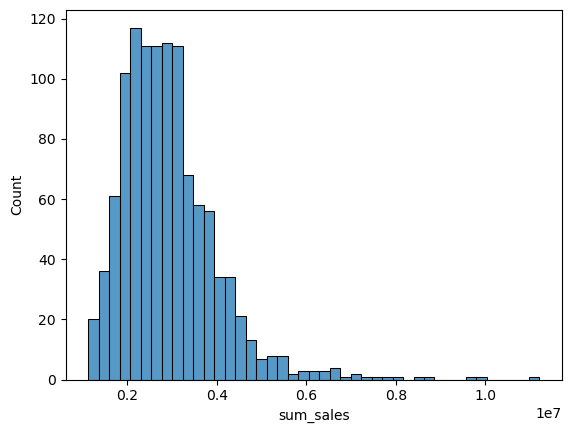

In [35]:
df_stores = df
df_stores['sum_sales'] = df_stores.groupby('store_id').agg({'sales': ['sum']})

sns.histplot(df_stores['sum_sales'])
plt.show()

# a few stores have very high sums of sales compared to the others

#### Day of week

               count         mean          std  min      25%     50%      75%  \
day_of_week                                                                     
1            81068.0  7786.487258  4009.784719  0.0  5197.00  7262.0  9937.00   
2            81884.0  6945.657259  3137.387142  0.0  4853.00  6407.0  8440.00   
3            81938.0  6477.810759  2953.157642  0.0  4652.00  6062.0  7850.00   
4            81421.0  6248.064222  3197.532497  0.0  4533.00  6001.0  7768.00   
5            81535.0  6722.734715  3086.890329  0.0  4970.00  6428.0  8197.00   
6            81494.0  5831.703524  2887.622066  0.0  3876.25  5387.0  7204.75   
7            81214.0   205.064275  1613.713693  0.0     0.00     0.0     0.00   

                 max  
day_of_week           
1            38037.0  
2            34692.0  
3            32149.0  
4            37403.0  
5            38722.0  
6            30940.0  
7            37376.0  


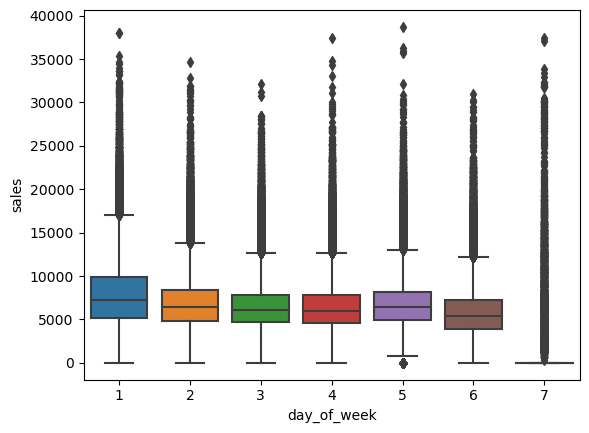

In [36]:
sns.boxplot(y='sales', x='day_of_week', data=df)
stats = df.groupby('day_of_week')['sales'].describe()

# Display the statistics
print(stats)
plt.show()

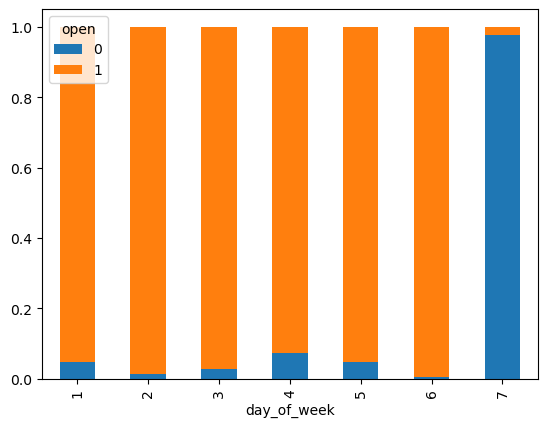

In [37]:
day_open = df.groupby('day_of_week')['open'].value_counts(normalize=True).unstack()
day_open.plot(kind='bar', stacked='True')
plt.show()

# day 1 has the highest mean of sales, day 7 has the lowest since stores are usually close (that's why all sales look like outliers in the boxplot)

#### Dates

In [38]:
print (df['date'].min()) # first day in the df
print(df['date'].max()) #last day in the df

2013-01-01 00:00:00
2015-04-22 00:00:00


In [39]:
# top 10 dates with higher sum of sales
df.groupby('date').agg({'sales': ['sum']}).sort_values(by=('sales', 'sum'), ascending=False).head(10)

,sales
,sum
date,
2013-12-16,9713911
2013-12-23,9193454
2013-12-02,8265957
2014-06-30,8168953
2015-03-30,7992258
2013-12-17,7799832
2013-12-20,7714324
2013-12-18,7607398


In [40]:
# bottom 10 dates with lower sum of sales
df.groupby('date').agg({'sales': ['sum']}).sort_values(by=('sales', 'sum'), ascending=False).tail(10)

,sales
,sum
date,
2013-01-20,85952
2013-05-01,82175
2013-01-27,80235
2013-07-28,80075
2013-01-13,75825
2014-01-19,71332
2014-01-01,71014
2015-01-18,65174


In [41]:
#Split the dates
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df

,index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,sum_sales,day,month,year
0,511306,52,2,2013-01-01,0,0,0,1,1,0,NaN,1,1,2013
1,150763,677,2,2013-01-01,0,0,0,1,1,0,2112617.0,1,1,2013
2,633749,348,2,2013-01-01,0,0,0,1,1,0,2299450.0,1,1,2013
3,106460,966,2,2013-01-01,0,0,0,1,1,0,3015926.0,1,1,2013
4,278363,750,2,2013-01-01,0,0,0,1,1,0,4284817.0,1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570549,162217,126,3,2015-04-22,416,1,0,0,0,3856,NaN,22,4,2015
570550,373333,715,3,2015-04-22,613,1,0,0,0,5154,NaN,22,4,2015
570551,586351,93,3,2015-04-22,553,1,0,0,0,4923,NaN,22,4,2015
570552,672462,845,3,2015-04-22,302,1,0,0,0,3974,NaN,22,4,2015


In [42]:
df.groupby('day').agg({'sales': ['min', 'mean', 'max', 'std', 'sum']}).sort_values(by=('sales', 'sum'), ascending=False)
# last days of the month and the 1st are lower in sum of sales

sales                                            
      min         mean    max          std        sum
day                                                  
4       0  6895.646141  32252  3877.506406  131244833
2       0  6846.721394  31803  4270.700140  130026086
5       0  6437.609782  32228  3923.721523  122147208
16      0  6273.153381  38037  4211.313300  119221280
18      0  6235.147349  35909  3991.182433  118187218
17      0  6252.890585  34692  3993.709085  117954528
7       0  6187.159574  32263  3683.902658  116900193
30      0  7003.984791  31810  4395.640095  113744713
19      0  5902.664819  33357  3827.485646  112900270
3       0  5848.247230  38722  4449.654944  110824285
6       0  5790.973372  33655  3896.308724  109825810
20      0  5762.459051  31157  3874.444429  109763320
28      0  5922.312917  27789  3681.575314  108295414
14      0  5648.074811  30112  3509.971519  107358606
21      0  5585.612050  37122  3606.237525  106054016
15      0  5544.397330  32221  3980.721602  105060785
8       0  5506.886125  31263  3622.041549  104696919
10      0  5527.689741  28242  3297.834351  104528613
13      0  5532.747716  30993  3433.543812  104148443
23      0  5659.980495  35350  3768.853484  103305964
11      0  5443.205929  32347  3034.956297  103192298
12      0  5351.008724  30983  3346.619941  101824345
22      0  5346.923353  37376  3661.475473  101431136
27      0  5504.904387  32461  3417.280069  101389329
9       0  5147.669010  34692  3632.881237   97373307
24      0  5069.363169  33071  3128.161587   92769346
26      0  5077.657749  32169  3424.341492   92621555
25      0  4930.196711  31383  3320.197533   90227530
29      0  5400.722352  37403  4190.932526   87707731
1       0  4448.924333  34814  4688.123979   85018944
31      0  6462.233028  32368  4187.655676   69772730

<Axes: xlabel='day', ylabel='sales'>

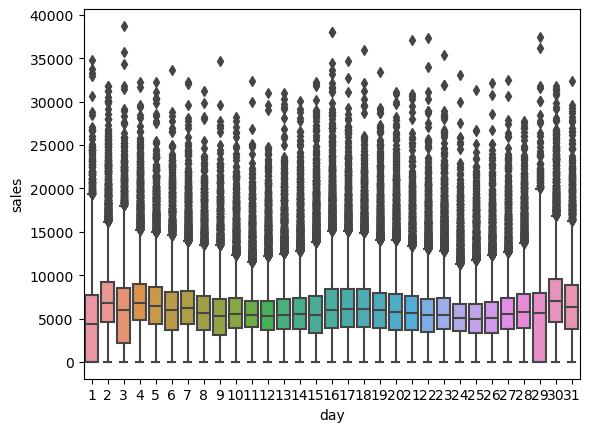

In [43]:
sns.boxplot(y='sales', x='day', data=df)

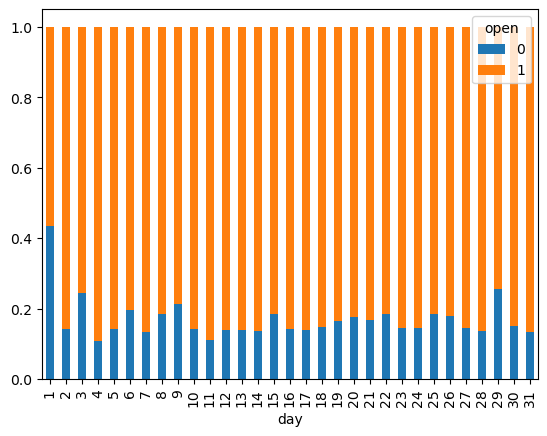

In [44]:
day_open = df.groupby('day')['open'].value_counts(normalize=True).unstack()
day_open.plot(kind='bar', stacked='True')
plt.show()

# first day of the months is more often closed then sales are 0

In [45]:
df.groupby('month').agg({'sales': ['min', 'mean', 'max', 'std', 'sum']}).sort_values(by=('sales', 'sum'), ascending=False)
# first months of the year and December have higher sum of sales

sales                                            
        min         mean    max          std        sum
month                                                  
3         0  5784.065520  36227  3872.045809  378804235
1         0  5452.861614  32263  3568.053555  356638961
2         0  5645.027095  31649  3515.179706  332300165
4         0  5649.957388  38722  3939.175201  325109848
12        0  6825.386305  38025  5049.164949  273206563
7         0  6035.865653  32221  3646.111907  241350124
5         0  5488.066315  37403  3936.864704  239334572
6         0  5558.441905  38037  3856.874332  234699651
11        0  6007.007709  30940  3841.296806  232218904
8         0  5705.559173  32252  3550.383999  227651811
10        0  5528.251814  35702  3537.282333  221666313
9         0  5588.304119  32926  3532.130081  216535608

In [46]:
df.groupby('year').agg({'sales': ['min', 'mean', 'max', 'std', 'sum']}).sort_values(by=('sales', 'sum'), ascending=False)
# sum of sales is much lower in 2015 because we only have data until April

sales                                             
       min         mean    max          std         sum
year                                                   
2013     0  5662.198421  38025  3821.555043  1450728844
2014     0  5834.078328  38037  3884.152987  1375092262
2015     0  5769.199896  38722  3764.790135   453695649

In [47]:
df.groupby(['month', 'year']).agg({'sales': ['min', 'mean', 'max', 'std', 'sum']}).sort_values(by=('sales', 'sum'), ascending=False)
# December, July and March are high selling months

sales                                            
             min         mean    max          std        sum
month year                                                  
12    2013     0  6672.653632  38025  5146.063077  145043472
7     2013     0  6045.933753  32221  3704.070024  131692529
3     2015     0  5937.037982  28339  3806.570308  130050817
12    2014     0  7006.893609  37122  4925.521577  128163091
3     2013     0  5832.365578  36227  4103.388130  127279714
1     2015     0  5750.919302  32228  3660.271280  124927220
8     2013     0  5739.905456  32252  3514.785735  124458370
11    2013     0  5886.828069  30940  3649.372294  123741126
5     2014     0  5623.764185  37403  3834.891757  123199802
4     2014     0  5812.123064  35909  4046.690665  123077518
3     2014     0  5581.661719  32368  3685.532947  121473704
6     2014     0  5692.985529  38037  4164.904238  120383872
10    2013     0  5422.042418  34369  3484.376065  118108350
1     2014     0  5408.165254  26911  3555.699487  118011574
5     2013     0  5351.092936  33357  4032.645035  116134770
4     2013     0  5488.746707  33326  3632.625261  115000221
6     2013     0  5423.464228  31810  3515.804980  114315779
1     2013     0  5201.288518  32263  3464.685776  113700167
9     2013     0  5342.883281  32926  3438.852006  112745523
2     2014     0  5726.405425  30507  3530.171343  112105839
      2015     0  5698.530690  29876  3475.351108  111685503
7     2014     0  6023.818666  29151  3575.591939  109657595
2     2013     0  5510.859472  31649  3535.877317  108508823
11    2014     0  6150.231205  30066  4053.639076  108477778
9     2014     0  5881.791057  29599  3618.850123  103790085
10    2014     0  5654.579174  35702  3595.209673  103557963
8     2014     0  5664.678103  30011  3591.964049  103193441
4     2015     0  5646.302647  38722  4174.109806   87032109

#### Promotion

In [48]:
df.groupby('promotion').agg({'sales': ['min', 'mean', 'max', 'std', 'sum']}).sort_values(by=('sales', 'sum'), ascending=False)
# promotion days have a higher sum of sales

sales                                             
            min         mean    max          std         sum
promotion                                                   
1             0  7964.032659  38722  3406.804963  1723536128
0             0  4393.700290  37403  3440.483562  1555980627

#### State Holiday

In [49]:
df.groupby('state_holiday').agg({'sales': ['min', 'mean', 'max', 'std', 'sum']}).sort_values(by=('sales', 'sum'), ascending=False)

sales                                             
                min         mean    max          std         sum
state_holiday                                                   
0                 0  5917.866506  38037  3760.185294  3275195875
1                 0   252.505844  38722  1843.073660     4320880

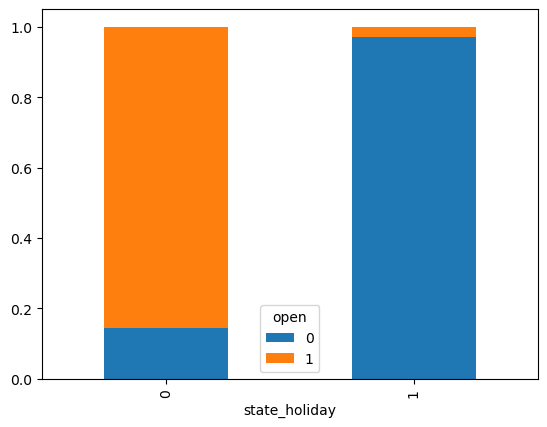

In [50]:
day_open = df.groupby('state_holiday')['open'].value_counts(normalize=True).unstack()
day_open.plot(kind='bar', stacked='True')
plt.show()

# on state holidays stores are usually close so sales are mostly 0

#### School holiday

In [51]:
df.groupby('school_holiday').agg({'sales': ['min', 'mean', 'max', 'std', 'sum']}).sort_values(by=('sales', 'sum'), ascending=False)
# school holidays have higher sums of sales

sales                                             
                 min         mean    max          std         sum
school_holiday                                                   
0                  0  5605.534781  38722  3846.123562  2615637823
1                  0  6387.320511  35350  3749.916917   663878932

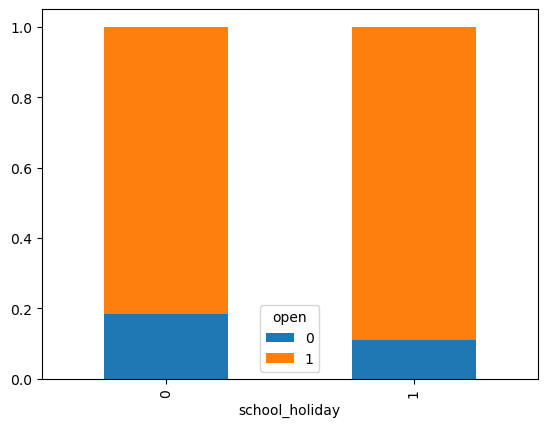

In [52]:
day_open = df.groupby('school_holiday')['open'].value_counts(normalize=True).unstack()
day_open.plot(kind='bar', stacked='True')
plt.show()
# stores are usually open on school holidays

### Correlations

In [53]:
df.columns

Index(['index', 'store_id', 'day_of_week', 'date', 'nb_customers_on_day',
       'open', 'promotion', 'state_holiday', 'school_holiday', 'sales',
       'sum_sales', 'day', 'month', 'year'],
      dtype='object')

In [54]:
df_metrics = df [['day_of_week', 'nb_customers_on_day',
       'open', 'promotion', 'state_holiday', 'school_holiday', 'day',
       'month', 'year', 'sales']]

correlations_matrix = df_metrics.corr()['sales']
print(correlations_matrix.sort_values(ascending=False))

sales                  1.000000
nb_customers_on_day    0.896997
open                   0.676281
promotion              0.451064
school_holiday         0.078569
month                  0.051951
year                   0.015412
day                   -0.014952
state_holiday         -0.251601
day_of_week           -0.458895
Name: sales, dtype: float64


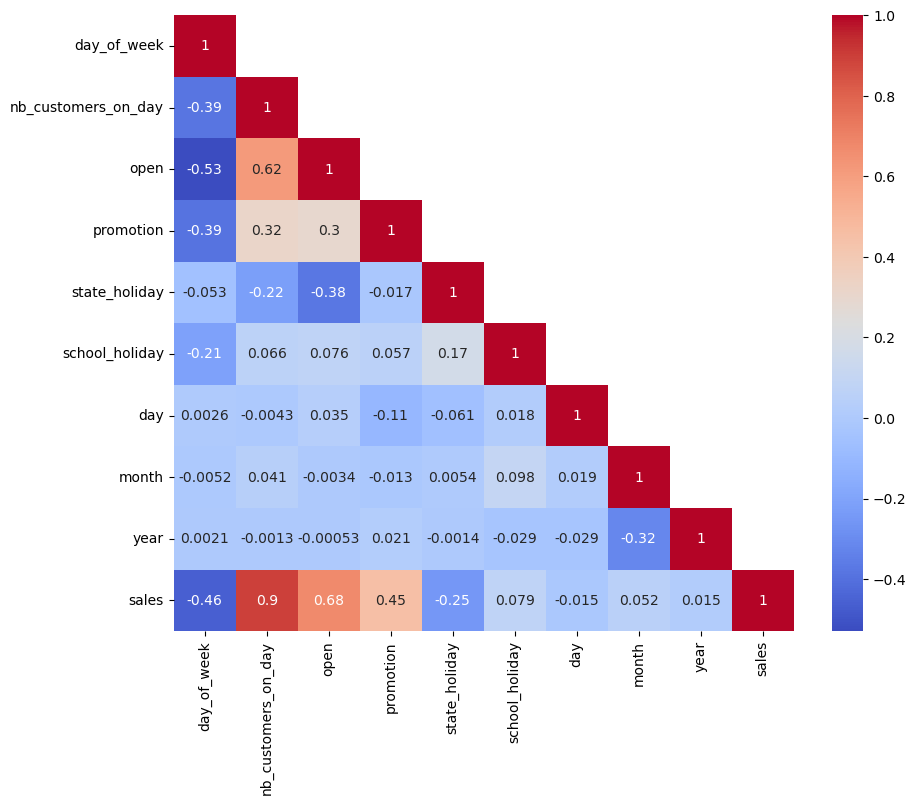

In [55]:
correlations_matrix = df_metrics.corr()

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask, k=1)] = True

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap="coolwarm")
plt.yticks(rotation=0)
plt.show()

<Axes: xlabel='sales', ylabel='nb_customers_on_day'>

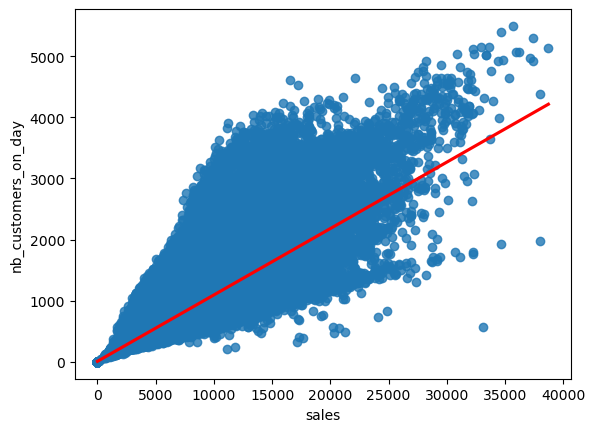

In [56]:
# most highly correlated variable

sns.regplot(x= 'sales', y= 'nb_customers_on_day', data=df_metrics, scatter=True, line_kws={"color": "red"})

### Prediction of Sales

In [60]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import statsmodels.api as sm
from statsmodels.formula.api import ols

# X/y SPLIT
y = df_metrics['sales']
X = df_metrics.drop(['sales'], axis=1)
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

# all P-values are below 0.05, so all of theses metrics are interesting for the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 3.773e+05
Date:                Wed, 03 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:49:04   Log-Likelihood:            -4.9654e+06
No. Observations:              570554   AIC:                         9.931e+06
Df Residuals:                  570544   BIC:                         9.931e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.548e+05   5854.198    -43.516      0.000   -2.66e+05   -2.43e+05
day_of_week           -73.1422      1.261    -57.985      0.000     -75.615     -70.670
nb_customers_on_day     6.0643      0.005   1129.733      0.000       6.054       6.075
open                 1471.6862      7.832    187.918      0.000    1456.337    1487.036
promotion            1269.5255      4.438    286.050      0.000    1260.827    1278.224
state_holiday        -743.7242     13.088    -56.826      0.000    -769.376    -718.073
school_holiday         51.8306      5.216      9.937      0.000      41.608      62.054
day                    -0.4394      0.223     -1.975      0.048      -0.876      -0.003
month                  34.2177      0.583     58.663      0.000      33.074      35.361
year                  126.6661      2.907     43.578      0.000     120.969     132.363
==============================================================================
Omnibus:                   101465.486   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1854053.252
Skew:                           0.325   Prob(JB):                         0.00
Kurtosis:                      11.807   Cond. No.                     6.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
y = df_metrics['sales']
X = df_metrics.drop(['sales'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)

In [62]:
lm = linear_model.LinearRegression()
lm = lm.fit(X_train,y_train)

lm.score(X_train,y_train)

pred = lm.predict(X_test)

print("R2 value is = ",round(r2_score(y_test, pred),2))
mse = mean_squared_error (y_test, pred)
mae = mean_absolute_error (y_test, pred)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.86
The mse of the model is =  2096568.9216190674
The root mse of the model is =  1447.9533561614019
The mean absolute error of the model is =  972.0818975428538


#### Decision Tree

In [63]:
y_tree = df_metrics['sales']
X_tree = df_metrics.drop(['sales'], axis=1)

from sklearn.model_selection import train_test_split
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, random_state=0, test_size = 0.2)

In [64]:
from sklearn.tree import DecisionTreeRegressor

max_depth = range(1,30)
test_tree = []
train_tree = []

for depth in max_depth:
    model_tree = DecisionTreeRegressor(max_depth= depth)
    model_tree.fit(X_train_tree, y_train_tree)
    pred_tree = model_tree.predict(X_test_tree)
    mse = mean_squared_error (y_test_tree, pred_tree)
    test_tree.append(np.sqrt(mse))

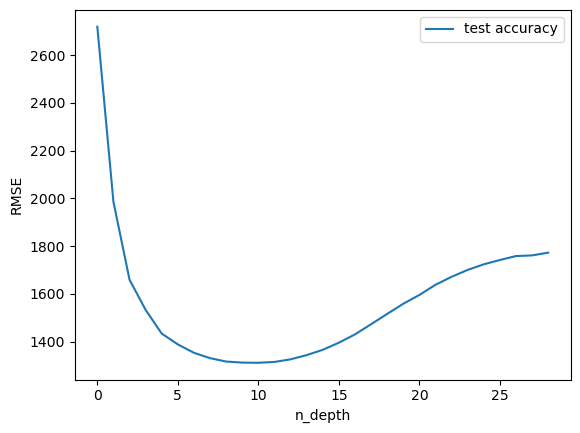

In [65]:
plt.plot( test_tree, label="test accuracy")
plt.ylabel("RMSE")
plt.xlabel("n_depth")
plt.legend()

In [66]:
tree_model = DecisionTreeRegressor(max_depth = 8)
tree_model.fit(X_train_tree,y_train_tree)

DecisionTreeRegressor(max_depth=8)

In [67]:
tree_pred = tree_model.predict(X_test_tree)

In [68]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("R2 value is = ",round(r2_score(y_test_tree, tree_pred),2))
mse = mean_squared_error (y_test_tree, tree_pred)
mae = mean_absolute_error (y_test_tree, tree_pred)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

# a little better than linear regresison

R2 value is =  0.88
The mse of the model is =  1769733.5042876557
The root mse of the model is =  1330.313310572985
The mean absolute error of the model is =  879.5225270536761


### Data cleaning an Filtering

#### Closed days

In [69]:
df_closedays = df[df['open'] == 0]
df_closedays = df_closedays[['day_of_week', 'nb_customers_on_day',
       'promotion', 'state_holiday', 'school_holiday', 'day',
       'month', 'year', 'sales']]
df_closedays.head()

,day_of_week,nb_customers_on_day,promotion,state_holiday,school_holiday,day,month,year,sales
0,2,0,0,1,1,1,1,2013,0
1,2,0,0,1,1,1,1,2013,0
2,2,0,0,1,1,1,1,2013,0
3,2,0,0,1,1,1,1,2013,0
4,2,0,0,1,1,1,1,2013,0


In [70]:
correlations_close = df_closedays.corr()['sales']
print(correlations_close.sort_values(ascending=False))
# no correlations because there are no sales

day_of_week           NaN
nb_customers_on_day   NaN
promotion             NaN
state_holiday         NaN
school_holiday        NaN
day                   NaN
month                 NaN
year                  NaN
sales                 NaN
Name: sales, dtype: float64


In [71]:
# Linear Regression Model
y_closed = df_closedays['sales']
X_closed = df_closedays.drop(['sales'], axis=1)
model_closed = sm.OLS(y_closed,X_closed).fit()
model_closed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                     nan
Model:                            OLS   Adj. R-squared (uncentered):                nan
Method:                 Least Squares   F-statistic:                                nan
Date:                Wed, 03 Jul 2024   Prob (F-statistic):                         nan
Time:                        21:50:01   Log-Likelihood:                             inf
No. Observations:               96747   AIC:                                       -inf
Df Residuals:                   96740   BIC:                                       -inf
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
day_of_week                  0          0        nan        nan           0           0
nb_customers_on_day          0          0        nan        nan           0           0
promotion                    0          0        nan        nan           0           0
state_holiday                0          0        nan        nan           0           0
school_holiday               0          0        nan        nan           0           0
day                          0          0        nan        nan           0           0
month                        0          0        nan        nan           0           0
year                         0          0        nan        nan           0           0
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                     3.16e+19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 3.93e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [72]:
lm_close = linear_model.LinearRegression()
lm_close = lm_close.fit(X_closed,y_closed)

lm_close.score(X_closed,y_closed)

pred_close = lm_close.predict(X_closed)

print("R2 value is = ",round(r2_score(y_closed, pred_close),2))
mse = mean_squared_error (y_closed, pred_close)
mae = mean_absolute_error (y_closed, pred_close)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  1.0
The mse of the model is =  0.0
The root mse of the model is =  0.0
The mean absolute error of the model is =  0.0


In [73]:
pred_close
# it only predicts zeros as it should

array([0., 0., 0., ..., 0., 0., 0.])

#### Open days

In [74]:
df_opendays = df[df['open'] == 1]
df_opendays = df_opendays[['day_of_week', 'nb_customers_on_day', 
       'promotion', 'state_holiday', 'school_holiday', 'day',
       'month', 'year', 'sales']]
df_opendays.head()

,day_of_week,nb_customers_on_day,promotion,state_holiday,school_holiday,day,month,year,sales
199,2,777,0,1,1,1,1,2013,3821
223,2,729,0,1,1,1,1,2013,3102
305,2,1751,0,1,1,1,1,2013,9643
312,2,1444,0,1,1,1,1,2013,6851
421,2,1248,0,1,1,1,1,2013,5035


In [75]:
correlations_open = df_opendays.corr()['sales']
print(correlations_open.sort_values(ascending=False))

'''GENERAL MATRIX TO COMPARE
sales                  1.000000
nb_customers_on_day    0.896997
open                   0.676281
promotion              0.451064
school_holiday         0.078569
month                  0.051951
year                   0.015412
day                   -0.014952
state_holiday         -0.251601
day_of_week           -0.458895'''

# correlations changed

sales                  1.000000
nb_customers_on_day    0.827845
promotion              0.364994
month                  0.080900
school_holiday         0.038924
year                   0.023495
state_holiday          0.020998
day                   -0.058775
day_of_week           -0.173905
Name: sales, dtype: float64


'GENERAL MATRIX TO COMPARE\nsales                  1.000000\nnb_customers_on_day    0.896997\nopen                   0.676281\npromotion              0.451064\nschool_holiday         0.078569\nmonth                  0.051951\nyear                   0.015412\nday                   -0.014952\nstate_holiday         -0.251601\nday_of_week           -0.458895'

## Predictions of Sales on Open Days

In [76]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.formula.api import ols

y_open = df_opendays['sales']
X_open = df_opendays.drop(['sales', 'day'], axis=1)
X_open = sm.add_constant(X_open)
model_open = sm.OLS(y_open,X_open).fit()

model_open.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                 1.895e+05
Date:                Wed, 03 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:50:02   Log-Likelihood:            -4.1658e+06
No. Observations:              473807   AIC:                         8.332e+06
Df Residuals:                  473799   BIC:                         8.332e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.055e+05   7028.124    -43.469      0.000   -3.19e+05   -2.92e+05
day_of_week           -67.9589      1.416    -48.008      0.000     -70.733     -65.184
nb_customers_on_day     6.0585      0.006   1029.789      0.000       6.047       6.070
promotion            1316.6424      4.927    267.235      0.000    1306.986    1326.299
state_holiday       -1960.4187     72.700    -26.966      0.000   -2102.908   -1817.929
school_holiday         45.2273      5.935      7.620      0.000      33.595      56.860
month                  39.7662      0.702     56.641      0.000      38.390      41.142
year                  152.5657      3.490     43.720      0.000     145.726     159.405
==============================================================================
Omnibus:                    71978.364   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           947898.005
Skew:                           0.294   Prob(JB):                         0.00
Kurtosis:                       9.904   Cond. No.                     6.56e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Decision Tree (Open Days)

In [77]:
y_open = df_opendays['sales']
X_open = df_opendays.drop(['sales', 'day'], axis=1)

from sklearn.model_selection import train_test_split
X_train_open, X_test_open, y_train_open, y_test_open = train_test_split(X_open, y_open, random_state=0, test_size = 0.2)

In [78]:
from sklearn.tree import DecisionTreeRegressor

max_depth = range(1,30)
test_open = []
train_open = []

for depth in max_depth:
    model_open = DecisionTreeRegressor(max_depth= depth)
    model_open.fit(X_train_open, y_train_open)
    pred_open = model_open.predict(X_test_open)
    mse = mean_squared_error (y_test_open, pred_open)
    test_open.append(np.sqrt(mse))

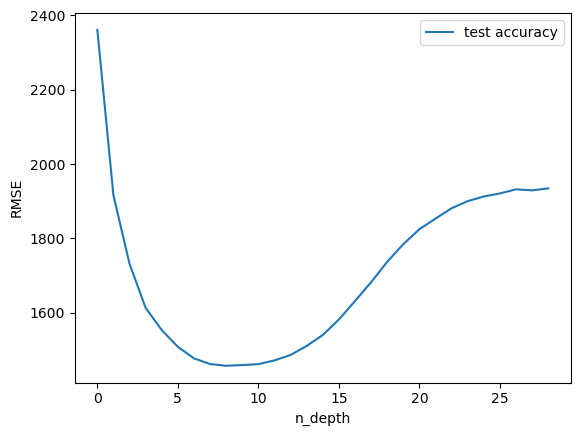

In [79]:
plt.plot( test_open, label="test accuracy")
plt.ylabel("RMSE")
plt.xlabel("n_depth")
plt.legend()

In [80]:
tree_model_open = DecisionTreeRegressor(max_depth = 7)
tree_model_open.fit(X_train_open, y_train_open)

DecisionTreeRegressor(max_depth=7)

In [81]:
tree_pred_open = tree_model_open.predict(X_test_open)

In [82]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("R2 value is = ",round(r2_score(y_test_open, tree_pred_open),2))
mse = mean_squared_error (y_test_open, tree_pred_open)
mae = mean_absolute_error (y_test_open, tree_pred_open)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.78
The mse of the model is =  2182798.4086013343
The root mse of the model is =  1477.4296628270783
The mean absolute error of the model is =  1071.4222336603318


## Model including feature engineering

In [14]:
df_opendays = df[df['open'] == 1]
df_opendays.head()

,index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year,quarter
199,580156,676,2,2013-01-01,777,1,0,1,1,3821,1,1,2013,1
223,277247,274,2,2013-01-01,729,1,0,1,1,3102,1,1,2013,1
305,253110,423,2,2013-01-01,1751,1,0,1,1,9643,1,1,2013,1
312,239216,259,2,2013-01-01,1444,1,0,1,1,6851,1,1,2013,1
421,60765,769,2,2013-01-01,1248,1,0,1,1,5035,1,1,2013,1


In [15]:
# Get mean of sales per store
store_sales = df_opendays.groupby('store_id')['sales'].mean().to_dict()
df_opendays['store_sales'] = df_opendays['store_id'].map(store_sales)

In [16]:
# Store ranking by sum of sales
store_sales_rank = df_opendays.groupby('store_id')['sales'].sum().rank(ascending=False).to_dict()
df_opendays['store_sales_rank'] = df_opendays['store_id'].map(store_sales_rank)

In [17]:
# Customer count rank by store
store_customer_rank = df_opendays.groupby('store_id')['nb_customers_on_day'].mean().rank(ascending=False).to_dict()
df_opendays['store_customer_rank'] = df_opendays['store_id'].map(store_customer_rank)

In [18]:
# Average customers per day of the week for each store
day_of_week_avg_customers = df_opendays.groupby(['store_id', 'day_of_week'])['nb_customers_on_day'].mean().reset_index()
day_of_week_avg_customers.columns = ['store_id', 'day_of_week', 'avg_customers_per_day_of_week']

# Merge the day_of_week_avg_customers back to the historical dataframe
df_opendays = df_opendays.merge(day_of_week_avg_customers, on=['store_id', 'day_of_week'], how='left')
df_opendays.head()

,index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year,quarter,store_sales,store_sales_rank,store_customer_rank,avg_customers_per_day_of_week
0,580156,676,2,2013-01-01,777,1,0,1,1,3821,1,1,2013,1,7485.211321,145.0,27.0,1661.550000
1,277247,274,2,2013-01-01,729,1,0,1,1,3102,1,1,2013,1,3855.526627,945.0,204.0,856.512821
2,253110,423,2,2013-01-01,1751,1,0,1,1,9643,1,1,2013,1,10722.498084,27.0,18.0,1716.246575
3,239216,259,2,2013-01-01,1444,1,0,1,1,6851,1,1,2013,1,11516.100539,18.0,12.0,2362.554054
4,60765,769,2,2013-01-01,1248,1,0,1,1,5035,1,1,2013,1,10521.184109,34.0,6.0,2955.246914


In [19]:
df_opendays.columns

Index(['index', 'store_id', 'day_of_week', 'date', 'nb_customers_on_day',
       'open', 'promotion', 'state_holiday', 'school_holiday', 'sales', 'day',
       'month', 'year', 'quarter', 'store_sales', 'store_sales_rank',
       'store_customer_rank', 'avg_customers_per_day_of_week'],
      dtype='object')

In [23]:
df_model = df_opendays[['day_of_week', 'nb_customers_on_day',
       'promotion', 'state_holiday', 'school_holiday', 'day',
       'month', 'year', 'quarter', 'store_sales','store_sales_rank', 'store_customer_rank','avg_customers_per_day_of_week','sales']]

correlations_open = df_model.corr()['sales']
print(correlations_open.sort_values(ascending=False))

sales                            1.000000
nb_customers_on_day              0.827845
store_sales                      0.774913
avg_customers_per_day_of_week    0.703677
promotion                        0.364994
month                            0.080900
quarter                          0.069056
school_holiday                   0.038924
year                             0.023495
state_holiday                    0.020998
day                             -0.058775
day_of_week                     -0.173905
store_customer_rank             -0.576876
store_sales_rank                -0.663663
Name: sales, dtype: float64


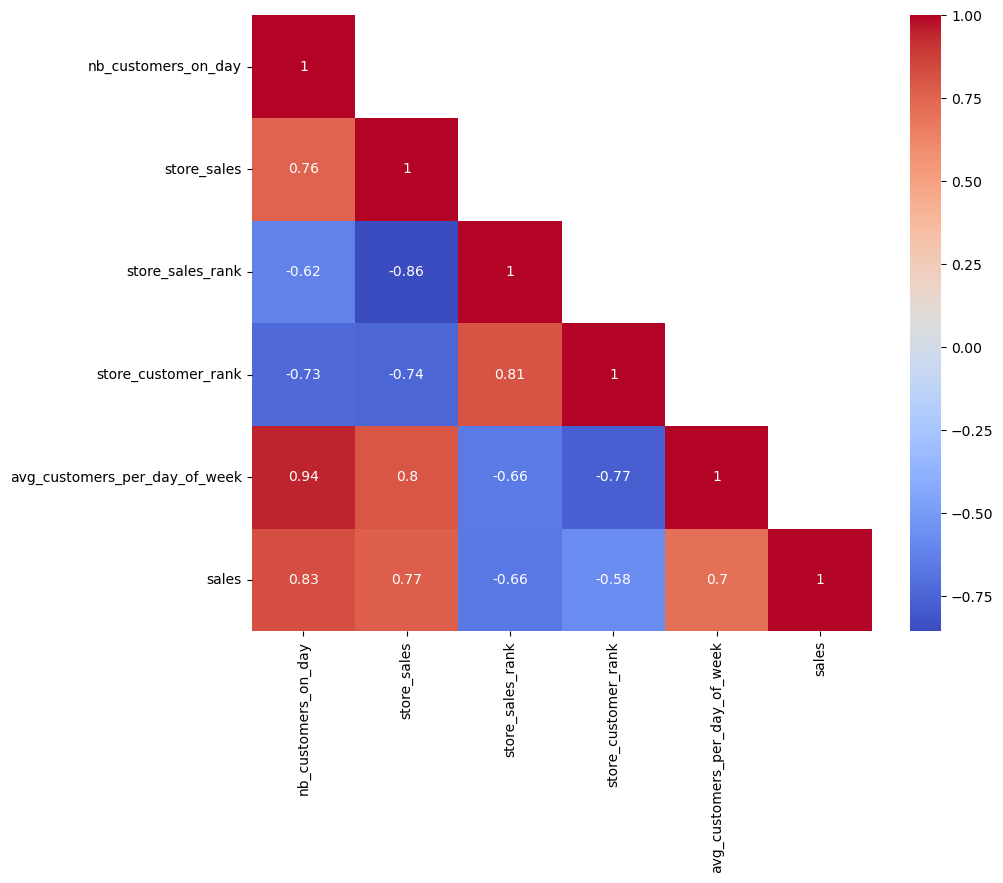

In [25]:
df_model_metrics = df_model[['nb_customers_on_day', 'store_sales','store_sales_rank', 'store_customer_rank','avg_customers_per_day_of_week', 'sales']]
correlations_matrix = df_model_metrics.corr()

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask, k=1)] = True

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap="coolwarm")
plt.yticks(rotation=0)
plt.show()

In [29]:
# X/y SPLIT
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.formula.api import ols

df_model = df_opendays[['nb_customers_on_day', 'store_sales','avg_customers_per_day_of_week','promotion','day_of_week','store_customer_rank','store_sales_rank','sales']]

y_open = df_model['sales']
X_open = df_model.drop(['sales'], axis=1)
X_open = sm.add_constant(X_open)

model_open = sm.OLS(y_open,X_open).fit()

model_open.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 6.635e+05
Date:                Fri, 26 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:15:00   Log-Likelihood:            -3.9182e+06
No. Observations:              473807   AIC:                         7.837e+06
Df Residuals:                  473799   BIC:                         7.837e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           413.0212     12.694     32.537      0.000     388.141     437.901
nb_customers_on_day              10.1511      0.012    881.946      0.000      10.129      10.174
store_sales                       0.7334      0.001    499.135      0.000       0.731       0.736
avg_customers_per_day_of_week    -8.0056      0.014   -585.103      0.000      -8.032      -7.979
promotion                       854.3197      3.223    265.086      0.000     848.003     860.636
day_of_week                    -201.3771      0.855   -235.395      0.000    -203.054    -199.700
store_customer_rank               1.4478      0.009    160.410      0.000       1.430       1.465
store_sales_rank                 -1.2322      0.011   -116.633      0.000      -1.253      -1.212
==============================================================================
Omnibus:                    99188.899   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2539195.294
Skew:                           0.391   Prob(JB):                         0.00
Kurtosis:                      14.314   Cond. No.                     6.90e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# Decision Tree
from sklearn.model_selection import train_test_split
X_train_open, X_test_open, y_train_open, y_test_open = train_test_split(X_open, y_open, random_state=0, test_size = 0.2)

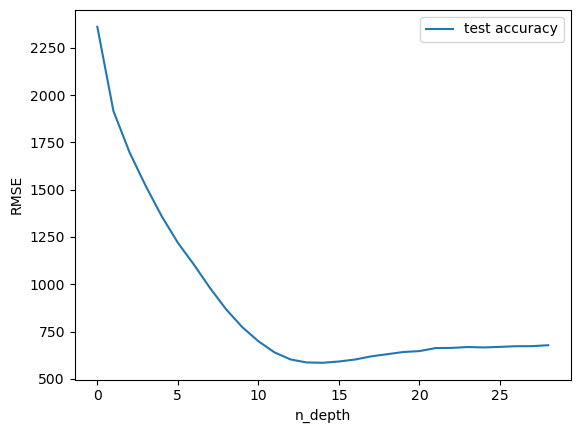

In [33]:
from sklearn.tree import DecisionTreeRegressor

max_depth = range(1,30)
test_open = []
train_open = []

for depth in max_depth:
    model_open = DecisionTreeRegressor(max_depth= depth)
    model_open.fit(X_train_open, y_train_open)
    pred_open = model_open.predict(X_test_open)
    mse = mean_squared_error (y_test_open, pred_open)
    test_open.append(np.sqrt(mse))

plt.plot( test_open, label="test accuracy")
plt.ylabel("RMSE")
plt.xlabel("n_depth")
plt.legend()

In [34]:
from sklearn.tree import DecisionTreeRegressor
model_open = DecisionTreeRegressor(max_depth = 14)
model_open.fit(X_train_open, y_train_open)

DecisionTreeRegressor(max_depth=14)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
tree_pred_open = model_open.predict(X_test_open)

print("R2 value is = ",round(r2_score(y_test_open, tree_pred_open),2))
mse = mean_squared_error (y_test_open, tree_pred_open)
mae = mean_absolute_error (y_test_open, tree_pred_open)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

# this is really good

R2 value is =  0.96
The mse of the model is =  342395.5309826152
The root mse of the model is =  585.1457348239113
The mean absolute error of the model is =  394.83072360026256


### Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
X_train_open, X_test_open, y_train_open, y_test_open = train_test_split(X_open, y_open, random_state=0, test_size = 0.2)

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold

model = RandomForestRegressor()

param_grid = {
    'n_estimators': [50,80,100],
    'max_depth': [13,14],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'bootstrap': [True, False]
    }

# Use KFold for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_open, y_train_open)

# Best model
best_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test_open)

# Evaluate the model
rmse = mean_squared_error(y_test_open, y_pred, squared=False)
print(f'RMSE: {rmse}')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
RMSE: 501.3083888465145


In [38]:
grid_search.best_params_ 

{'bootstrap': True,
 'max_depth': 14,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [39]:
# Load the trained model
import joblib
joblib.dump(best_model, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

In [40]:
best_model.fit(X_train_open, y_train_open)

RandomForestRegressor(max_depth=14, min_samples_leaf=2)

In [41]:
best_pred = best_model.predict(X_test_open)

print("R2 value is = ",round(r2_score(y_test_open, best_pred),2))
mse = mean_squared_error (y_test_open, best_pred)
mae = mean_absolute_error (y_test_open, best_pred)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.97
The mse of the model is =  251679.03525313156
The root mse of the model is =  501.67622552113386
The mean absolute error of the model is =  342.9189647319247


### Import and preprocess the 'future data'

In [66]:
df_new = pd.read_excel(r"Future_data_without_label.xlsx")

df_new.columns = df_new.columns.str.lower().str.replace(' ', '_')

coverage_mapping = {'a': 1, 'b': 1, 'c': 1, 0: 0}
df_new['state_holiday'] = df_new['state_holiday'].map(coverage_mapping)

df_new.head()

,index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,617699,761,3,2015-04-22,955,1,0,0,0,NaN
1,522235,238,3,2015-04-22,1025,1,0,0,0,NaN
2,321177,198,3,2015-04-22,203,1,0,0,0,NaN
3,395430,606,3,2015-04-22,585,1,0,0,0,NaN
4,488260,382,3,2015-04-22,555,1,0,0,0,NaN


In [67]:
df_new.nunique()

index                  70286
store_id                1115
day_of_week                7
date                     101
nb_customers_on_day     2535
open                       2
promotion                  2
state_holiday              2
school_holiday             2
sales                      1
dtype: int64

In [68]:
# Get open days to apply model
df_new_open = df_new[(df_new['open'] == 1) & (df_new['nb_customers_on_day'] > 0)]

In [69]:
# Apply trained ranks to new data
df_new_open['store_sales'] = df_new_open['store_id'].map(store_sales)

df_new_open['store_sales_rank'] = df_new_open['store_id'].map(store_sales_rank)

store_customer_rank = df_opendays.groupby('store_id')['nb_customers_on_day'].mean().rank(ascending=False).to_dict()
df_new_open['store_customer_rank'] = df_new_open['store_id'].map(store_customer_rank)

In [70]:
# Merge the average customers per day of the week to the new data

day_of_week_avg_customers = df_opendays.groupby(['store_id', 'day_of_week'])['nb_customers_on_day'].mean().reset_index()
day_of_week_avg_customers.columns = ['store_id', 'day_of_week', 'avg_customers_per_day_of_week']
df_new_open = df_new_open.merge(day_of_week_avg_customers, on=['store_id', 'day_of_week'], how='left')

In [71]:
df_new_open.head()

,index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,store_sales,store_sales_rank,store_customer_rank,avg_customers_per_day_of_week
0,617699,761,3,2015-04-22,955,1,0,0,0,NaN,8551.214286,209.0,175.0,987.485714
1,522235,238,3,2015-04-22,1025,1,0,0,0,NaN,7612.404598,311.0,117.0,1111.742857
2,321177,198,3,2015-04-22,203,1,0,0,0,NaN,2914.255079,1110.0,1103.0,310.878378
3,395430,606,3,2015-04-22,585,1,0,0,0,NaN,5795.739535,689.0,674.0,638.536585
4,488260,382,3,2015-04-22,555,1,0,0,0,NaN,8064.628378,238.0,596.0,617.679487


In [74]:
# Drop unnecessary columns
features_to_drop = ['sales', 'date']
df_new_open_features = df_new_open.drop(columns=features_to_drop, errors='ignore')

# Ensure all columns required for the model are present in the new data
missing_cols = set(X_open.columns) - set(df_new_open_features.columns)
for col in missing_cols:
    df_new_open_features[col] = 0

# Reorder columns to match the training set
df_new_open_features = df_new_open_features[X_open.columns]

# Predict sales using the best model
df_new_open['sales'] = best_model.predict(df_new_open_features)

In [75]:
# Merge final predictions back into df_new
df_new = df_new.drop(columns='sales')
df_new = df_new.merge(df_new_open[['index', 'sales']], on='index', how='left')
# Set sales to 0 for closed days or zero customers
df_new.loc[(df_new['open'] == 0) | (df_new['nb_customers_on_day'] == 0), 'sales'] = 0
df_new

,index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,617699,761,3,2015-04-22,955,1,0,0,0,7549.502422
1,522235,238,3,2015-04-22,1025,1,0,0,0,6593.575426
2,321177,198,3,2015-04-22,203,1,0,0,0,1534.860540
3,395430,606,3,2015-04-22,585,1,0,0,0,4973.586111
4,488260,382,3,2015-04-22,555,1,0,0,0,6121.302564
...,...,...,...,...,...,...,...,...,...,...
70281,369531,58,5,2015-07-31,603,1,1,0,0,7620.788765
70282,161452,241,5,2015-07-31,763,1,1,0,1,7423.215319
70283,242869,293,5,2015-07-31,878,1,1,0,1,6777.458027
70284,480480,14,5,2015-07-31,710,1,1,0,1,6383.719392


In [77]:
# Save the results with all columns
df_new.to_excel('Future_data_with_final_predictions.xlsx', index=False)

In [82]:
df_new_close = df_new[df_new['open'] == 0]
df_new_close                

,index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
2115,647262,875,7,2015-04-26,0,0,0,0,0,0.0
2116,109490,7,7,2015-04-26,0,0,0,0,0,0.0
2117,428204,672,7,2015-04-26,0,0,0,0,0,0.0
2118,593397,205,7,2015-04-26,0,0,0,0,0,0.0
2119,209159,936,7,2015-04-26,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
66754,652203,970,7,2015-07-26,0,0,0,0,0,0.0
66755,276729,760,7,2015-07-26,0,0,0,0,0,0.0
68837,530643,876,3,2015-07-29,0,0,1,0,1,0.0
69474,167551,292,4,2015-07-30,0,0,1,0,1,0.0
